# Exploring and Visualizing the Iris Dataset

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

sns.set_theme(style='whitegrid', palette='Set2')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

## 2.Load & Inspect the Data

In [2]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

print(f'Shape: {df.shape}')
print(f'Species: {df.species.unique().tolist()}')
print(f'\nClass Distribution:')
print(df['species'].value_counts())

Shape: (150, 5)
Species: ['setosa', 'versicolor', 'virginica']

Class Distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [3]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
print('Data Types:')
print(df.dtypes)
print(f'\nNull Values: {df.isnull().sum().sum()}')

Data Types:
sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
species         category
dtype: object

Null Values: 0


## 3.Summary Statistics

In [5]:
df.describe().round(2)

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [6]:
df.groupby('species').mean().round(2)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7340\2388686799.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('species').mean().round(2)


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.01,3.43,1.46,0.25
versicolor,5.94,2.77,4.26,1.33
virginica,6.59,2.97,5.55,2.03


## 4. Univariate Analysis
### Histograms & Box Plots

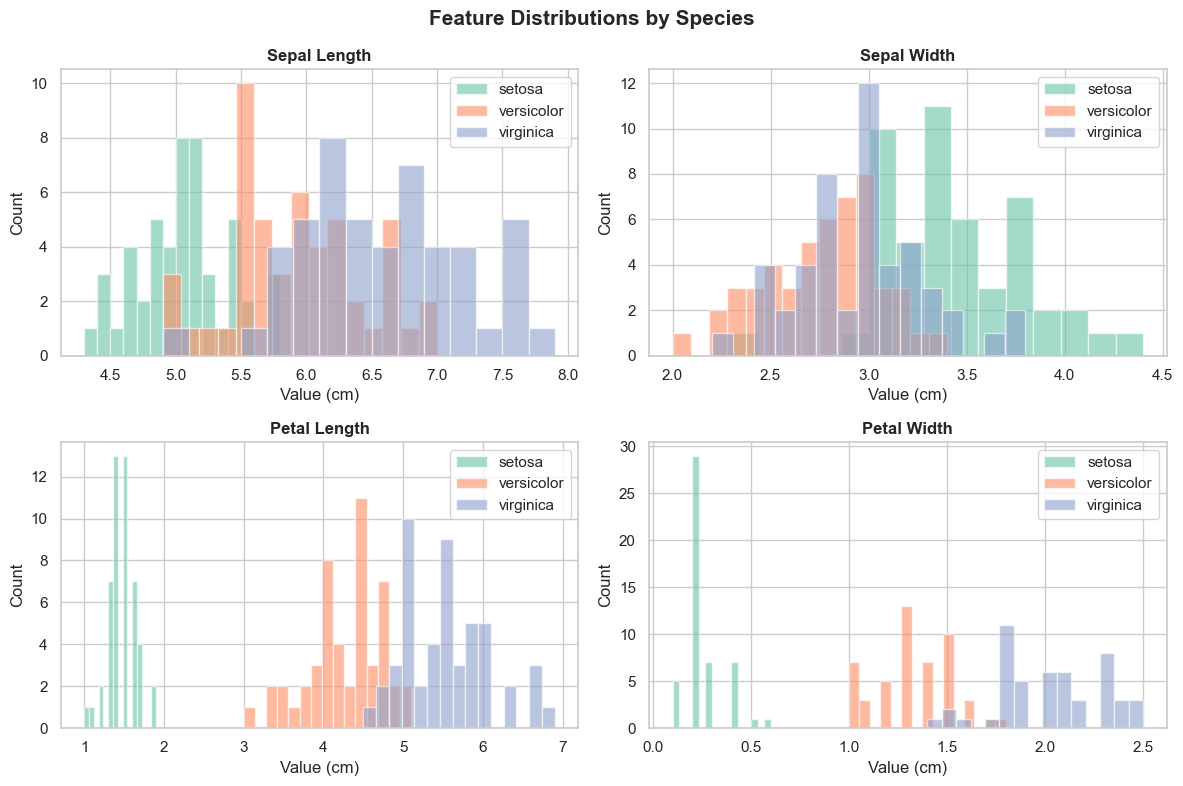

In [7]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
colors = sns.color_palette('Set2', 3)
species_list = df['species'].unique()

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(features):
    for j, sp in enumerate(species_list):
        subset = df[df['species'] == sp][feature]
        axes[i].hist(subset, bins=15, alpha=0.6, color=colors[j], label=sp, edgecolor='white')
    axes[i].set_title(feature.replace('_', ' ').title(), fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Value (cm)')
    axes[i].set_ylabel('Count')
    axes[i].legend()

plt.suptitle('Feature Distributions by Species', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7340\3280478944.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='species', y=feature, palette='Set2', ax=axes[i], width=0.5)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7340\3280478944.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='species', y=feature, palette='Set2', ax=axes[i], width=0.5)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7340\3280478944.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='species', y=feature, palette='Set2', ax=axes[i], wid

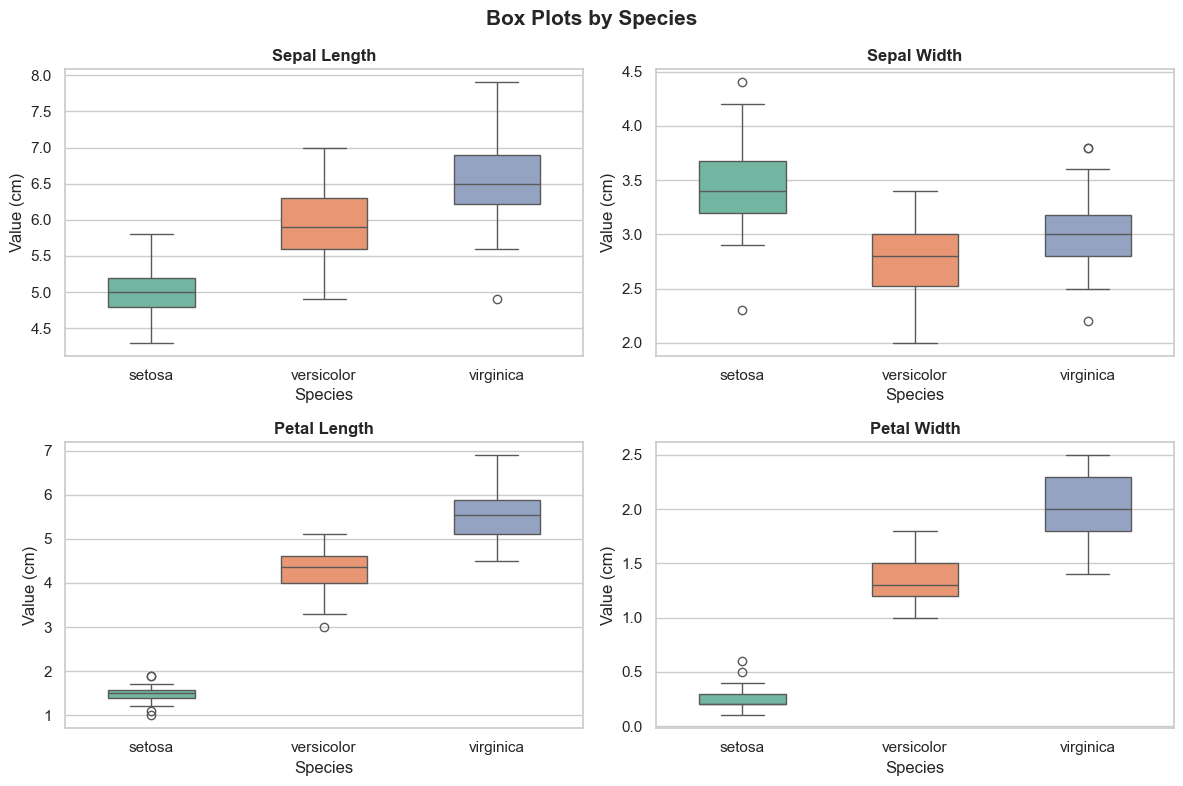

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(data=df, x='species', y=feature, palette='Set2', ax=axes[i], width=0.5)
    axes[i].set_title(feature.replace('_', ' ').title(), fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Species')
    axes[i].set_ylabel('Value (cm)')

plt.suptitle('Box Plots by Species', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

## 5. Bivariate Analysis
### Scatter Plots & Violin Plots

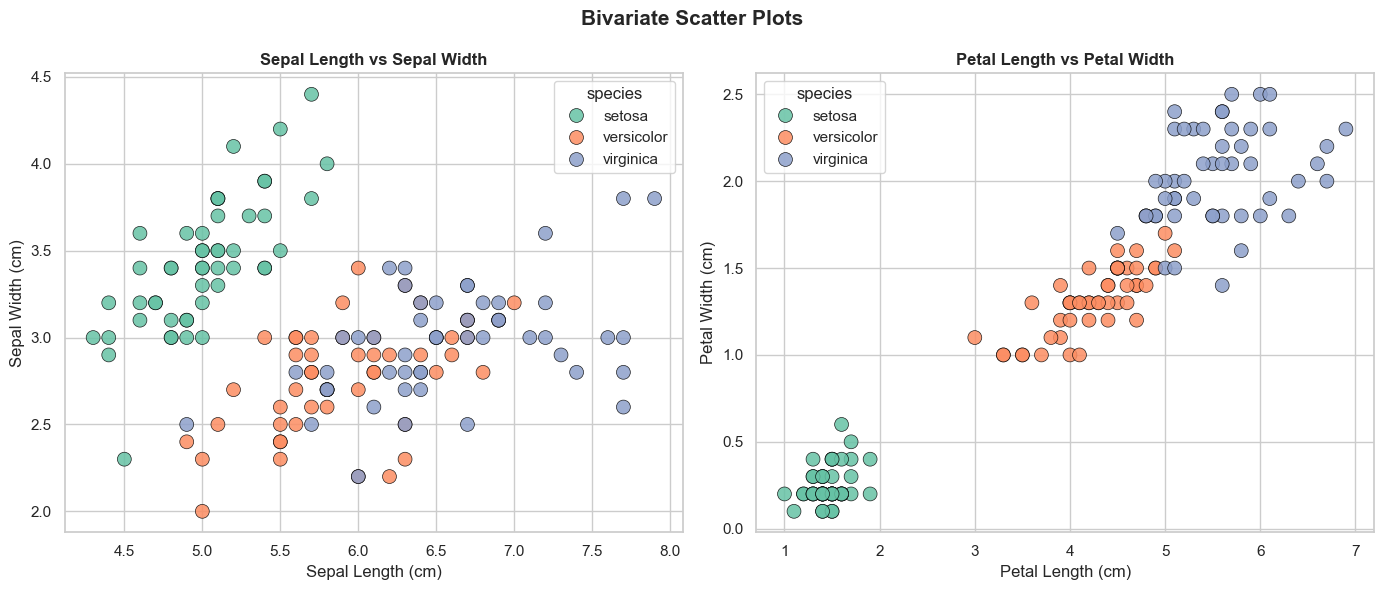

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=df, x='sepal_length', y='sepal_width',
    hue='species', palette='Set2', s=100, alpha=0.85,
    edgecolor='black', linewidth=0.5, ax=axes[0])
axes[0].set_title('Sepal Length vs Sepal Width', fontweight='bold')
axes[0].set_xlabel('Sepal Length (cm)')
axes[0].set_ylabel('Sepal Width (cm)')

sns.scatterplot(data=df, x='petal_length', y='petal_width',
    hue='species', palette='Set2', s=100, alpha=0.85,
    edgecolor='black', linewidth=0.5, ax=axes[1])
axes[1].set_title('Petal Length vs Petal Width', fontweight='bold')
axes[1].set_xlabel('Petal Length (cm)')
axes[1].set_ylabel('Petal Width (cm)')

plt.suptitle('Bivariate Scatter Plots', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7340\1995301579.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='species', y=feature,
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7340\1995301579.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='species', y=feature,
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7340\1995301579.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='species', y=feature,
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7340\1995301579.py:5: FutureWarning: 

Passing `palette

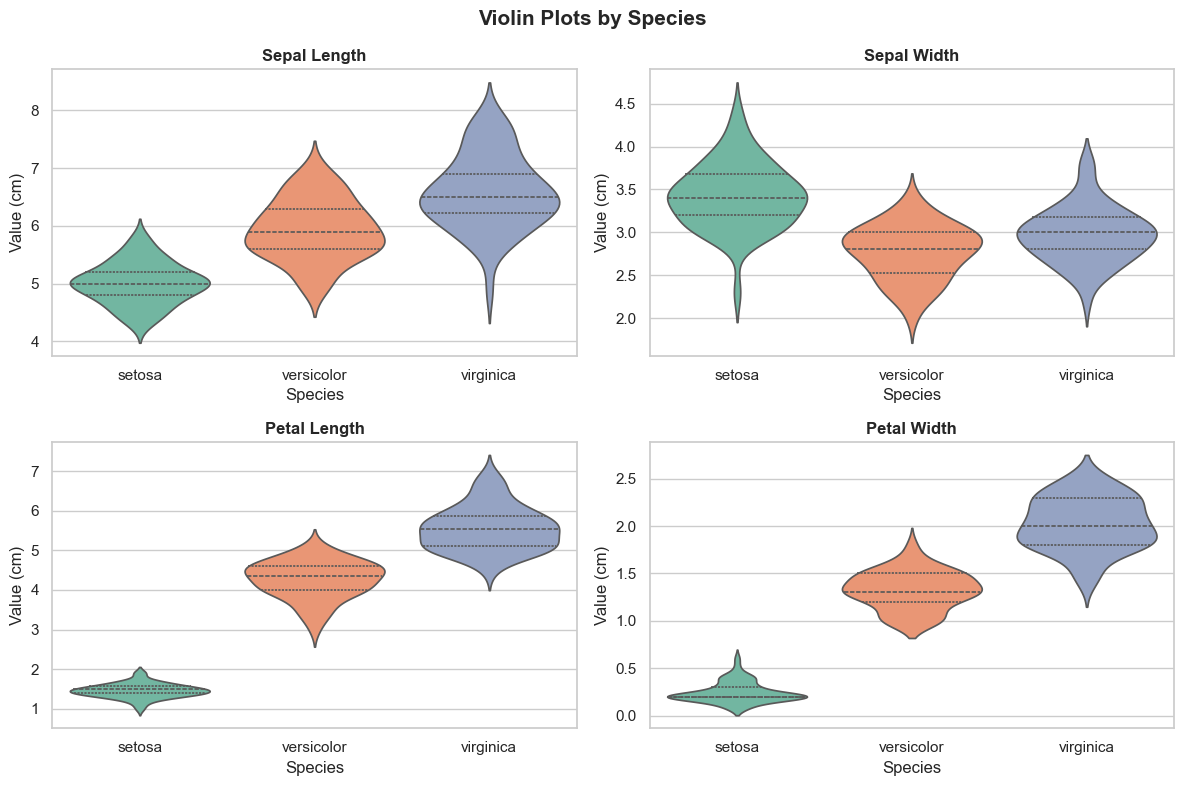

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.violinplot(data=df, x='species', y=feature,
        palette='Set2', inner='quartile', ax=axes[i])
    axes[i].set_title(feature.replace('_', ' ').title(), fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Species')
    axes[i].set_ylabel('Value (cm)')

plt.suptitle('Violin Plots by Species', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

## 6. Multivariate Analysis
### Pair Plot

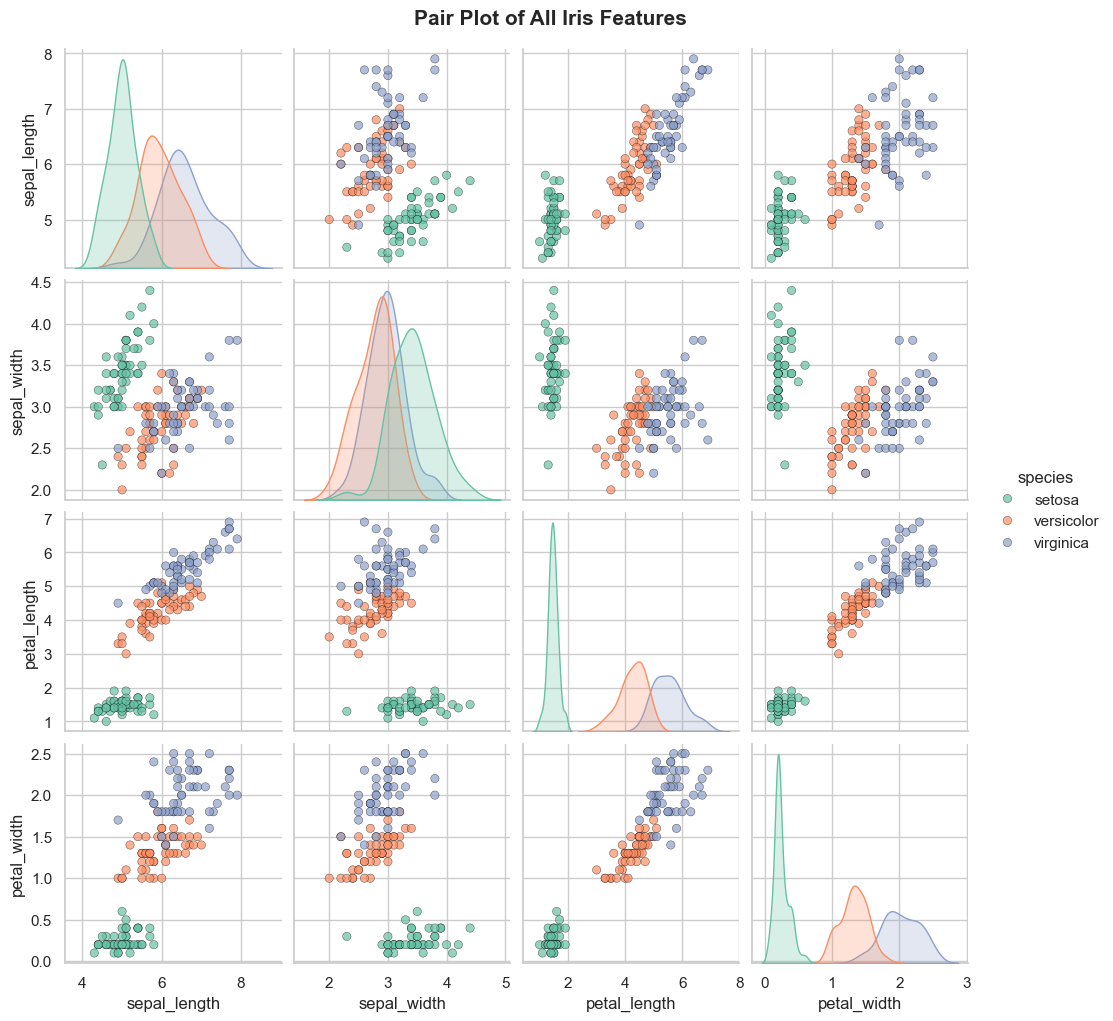

In [11]:
pair_plot = sns.pairplot(
    df, hue='species', palette='Set2',
    plot_kws={'alpha': 0.7, 'edgecolor': 'black', 'linewidth': 0.3},
    diag_kind='kde'
)
pair_plot.fig.suptitle('Pair Plot of All Iris Features', fontsize=15, fontweight='bold', y=1.02)
plt.show()

## 7. Correlation Heatmap

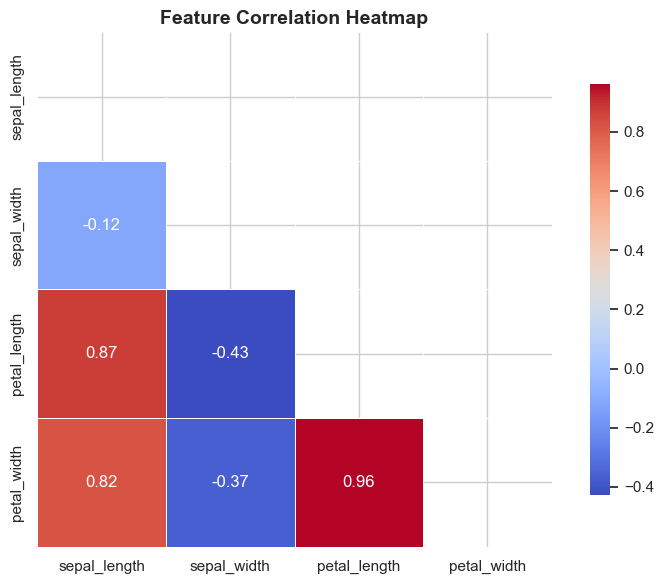

In [12]:
plt.figure(figsize=(8, 6))
corr = df[features].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(
    corr, annot=True, fmt='.2f',
    cmap='coolwarm', mask=mask,
    square=True, linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7340\4085018553.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  species_means = df.groupby('species')[features].mean()


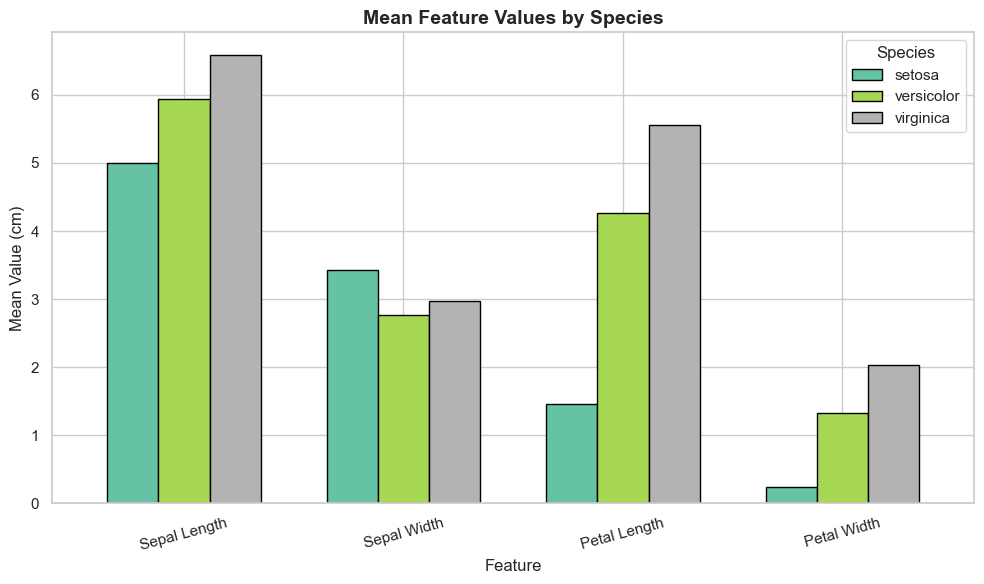

In [13]:
species_means = df.groupby('species')[features].mean()
species_means.T.plot(kind='bar', figsize=(10, 6), colormap='Set2',
    edgecolor='black', width=0.7)
plt.title('Mean Feature Values by Species', fontsize=14, fontweight='bold')
plt.xlabel('Feature')
plt.ylabel('Mean Value (cm)')
plt.xticks(
    ticks=range(4),
    labels=[f.replace('_', ' ').title() for f in features],
    rotation=15
)
plt.legend(title='Species')
plt.tight_layout()
plt.show()

## 8. Key Insights

### Species Separability
- **Iris setosa** is easily separable — it has significantly shorter and narrower petals.
- **Iris versicolor** and **Iris virginica** overlap somewhat but are generally distinguishable via petal dimensions.

### Most Discriminating Features
- **Petal length** and **petal width** are the strongest features for classification.
- **Sepal width** is the least useful discriminating feature.

### Correlations
- Petal length and petal width are **highly correlated** (~0.96).
- Sepal width shows weak or negative correlations with other features.

### Data Quality
- **No missing values** — dataset is clean.
- **Perfectly balanced** — 50 samples per species.
